In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/extrovert-vs-introvert-behavior-data/personality_datasert.csv
/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv


In [2]:
import pandas as pd

# Set the path to the file you'd like to load
file_path = "/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv"

# Load the dataset using pandas
df = pd.read_csv(file_path)

# Now you can work with your DataFrame (df)
print(df.head())

   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")

In [4]:
print("\n--- 2. Initial Data Inspection ---")
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()


--- 2. Initial Data Inspection ---
Dataset Shape: (2900, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [5]:
print("\nDescriptive statistics for numerical columns:")
print(df.describe())


Descriptive statistics for numerical columns:
       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2837.000000              2838.000000    2834.000000   
mean           4.505816                 3.963354       3.000000   
std            3.479192                 2.903827       2.247327   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 2.000000       1.000000   
50%            4.000000                 3.000000       3.000000   
75%            8.000000                 6.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2823.000000     2835.000000  
mean              6.268863        3.564727  
std               4.289693        2.926582  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               5.000000        3.000000  
75%              10.000000        

In [6]:
print("\nValue counts for categorical columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")


Value counts for categorical columns:

Stage_fear:
Stage_fear
No     1417
Yes    1410
Name: count, dtype: int64
Unique values: 2

Drained_after_socializing:
Drained_after_socializing
No     1441
Yes    1407
Name: count, dtype: int64
Unique values: 2

Personality:
Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64
Unique values: 2


In [7]:
# --- 3. Handle Missing Values ---
print("\n--- 3. Handling Missing Values ---")
print("Missing values before handling:")
print(df.isnull().sum())


--- 3. Handling Missing Values ---
Missing values before handling:
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [8]:
# Impute 'Time_spent_Alone' with its median
median_time_spent_alone = df['Time_spent_Alone'].median()
df['Time_spent_Alone'].fillna(median_time_spent_alone)
print(f"Imputed 'Time_spent_Alone' with median: {median_time_spent_alone}")

# Impute 'Going_outside' with its median
median_going_outside = df['Going_outside'].median()
df['Going_outside'].fillna(median_going_outside)
print(f"Imputed 'Going_outside' with median: {median_going_outside}")


print("\nMissing values after handling:")
print(df.isnull().sum())


Imputed 'Time_spent_Alone' with median: 4.0
Imputed 'Going_outside' with median: 3.0

Missing values after handling:
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [9]:
# --- 4. Distribution Analysis ---
print("\n--- 4. Distribution Analysis ---")

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print(numerical_cols)
print(categorical_cols)


--- 4. Distribution Analysis ---
['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
['Stage_fear', 'Drained_after_socializing', 'Personality']



Histograms for Numerical Features:


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

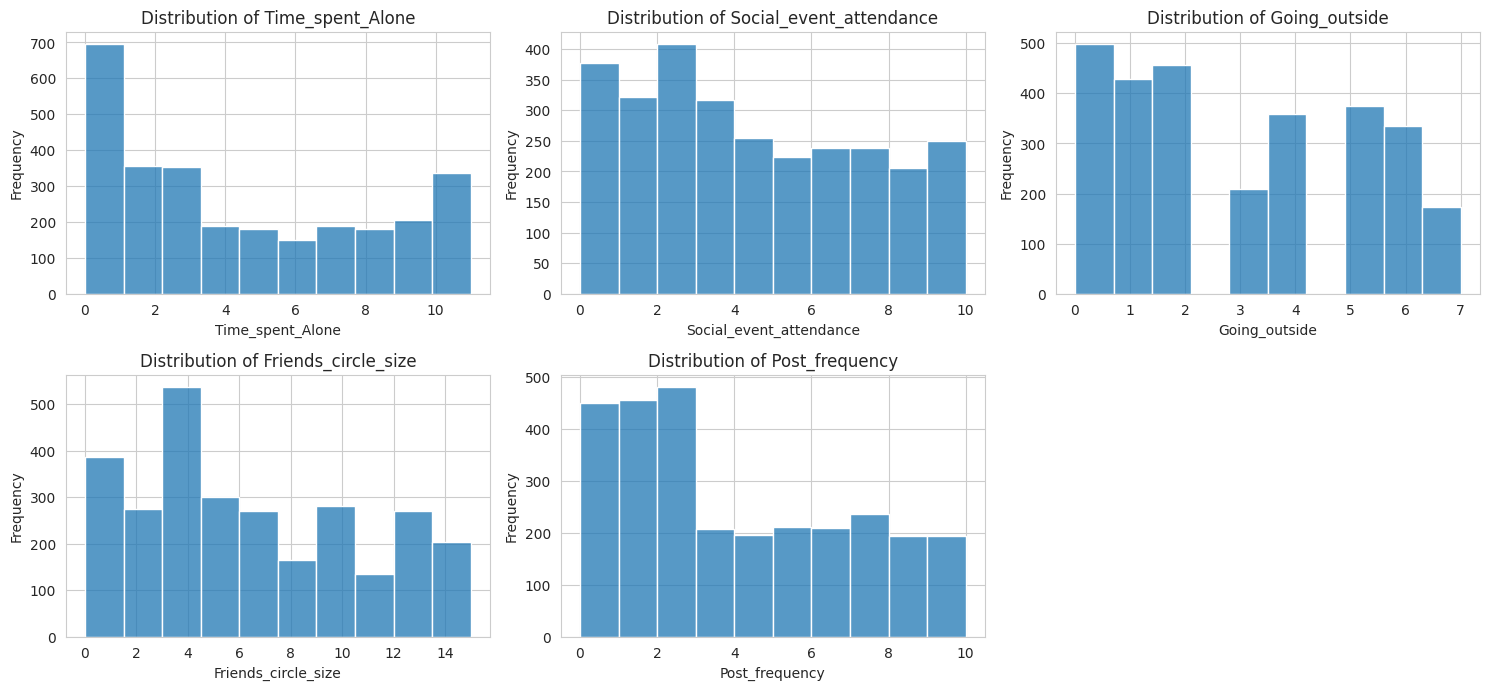

In [10]:
print("\nHistograms for Numerical Features:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], bins=10)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Count Plots for Categorical Features:


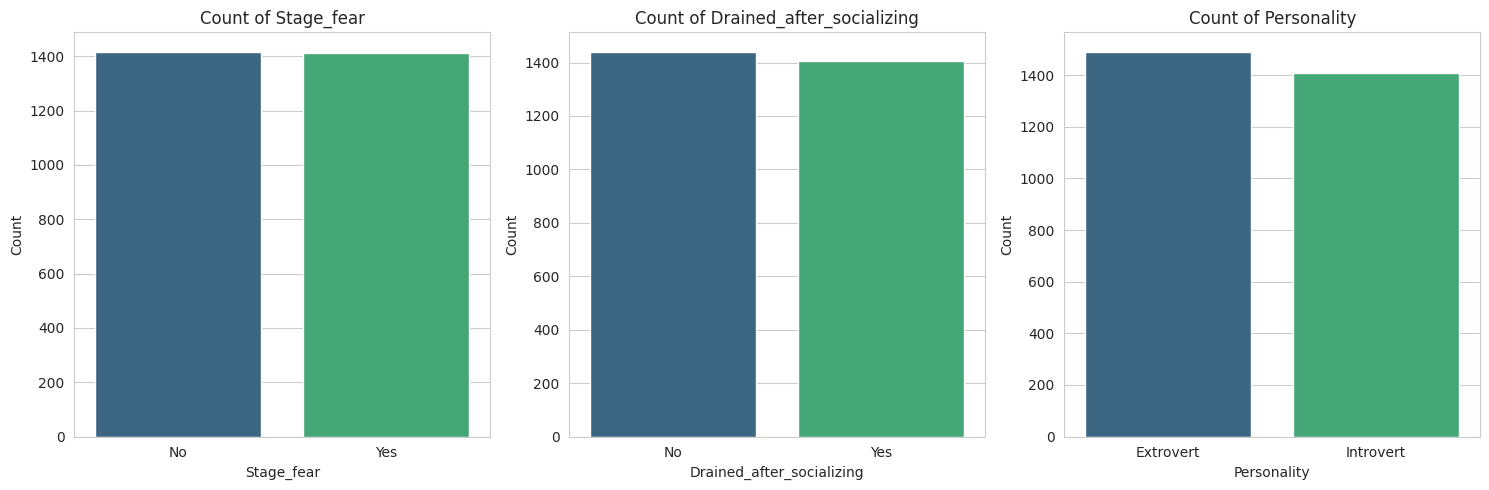

In [11]:
print("\nCount Plots for Categorical Features:")
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i + 1)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()



Target Variable Distribution ('Personality'):


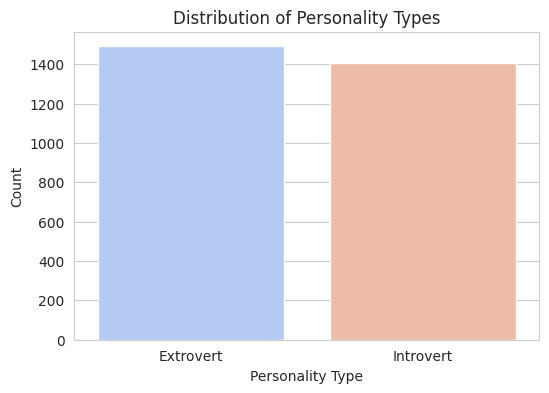

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64
Class Balance Check (Extrovert/Introvert): Personality
Extrovert    0.514138
Introvert    0.485862
Name: proportion, dtype: float64


In [12]:
# Analyze 'Personality' distribution (target variable)
print("\nTarget Variable Distribution ('Personality'):")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Personality', palette='coolwarm')
plt.title('Distribution of Personality Types')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.show()
print(df['Personality'].value_counts())
print("Class Balance Check (Extrovert/Introvert):", df['Personality'].value_counts(normalize=True))


--- 5. Outlier Detection (Box Plots) ---


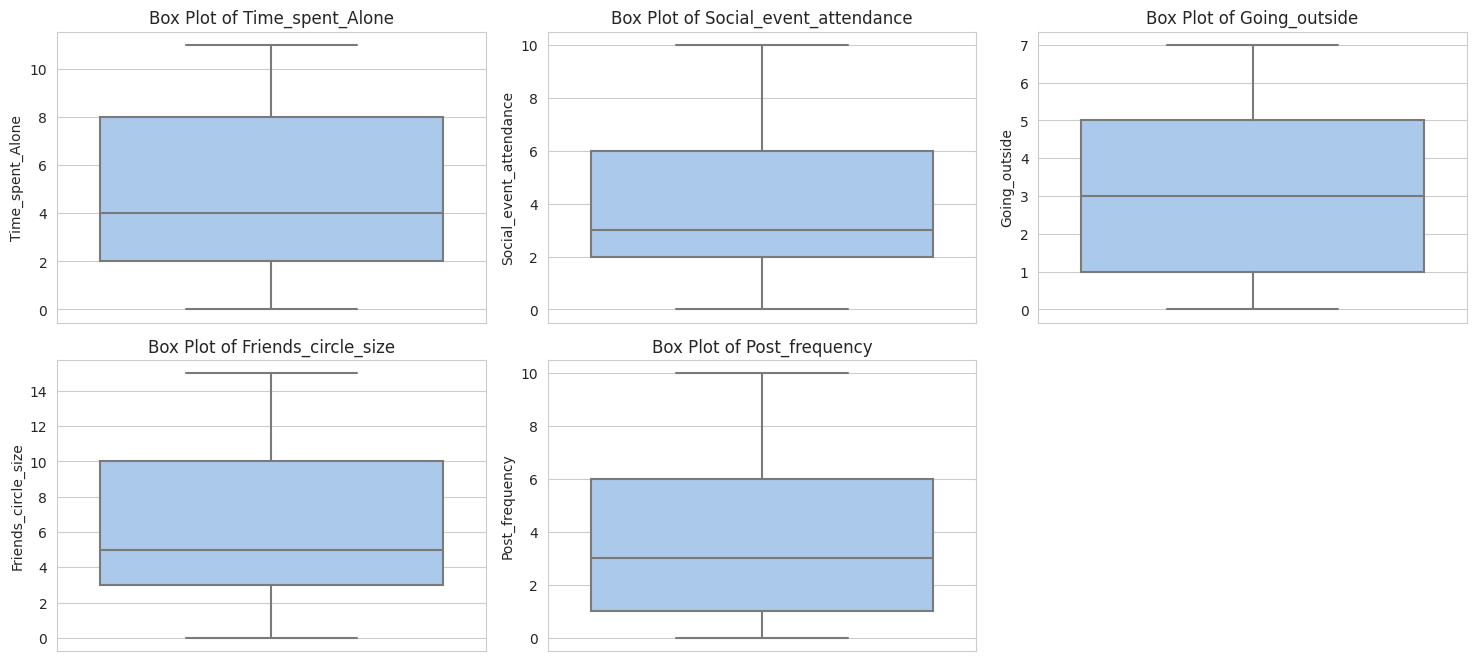

In [13]:
# --- 5. Outlier Detection (using Box Plots) ---
print("\n--- 5. Outlier Detection (Box Plots) ---")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col], palette='pastel')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Observations about outliers:
- Time_spent_Alone: Appears to have some outliers at 0 and 11, but these are likely valid as they represent min/max hours.
- Social_event_attendance: Some values beyond the main range, could be outliers but also valid.
- Going_outside: Similar to Time_spent_Alone, values at min/max could appear as outliers.
- Post_frequency: Values above ~7-8 appear as outliers. Again, could be genuine.


Box Plots of Numerical Features by Personality Type:


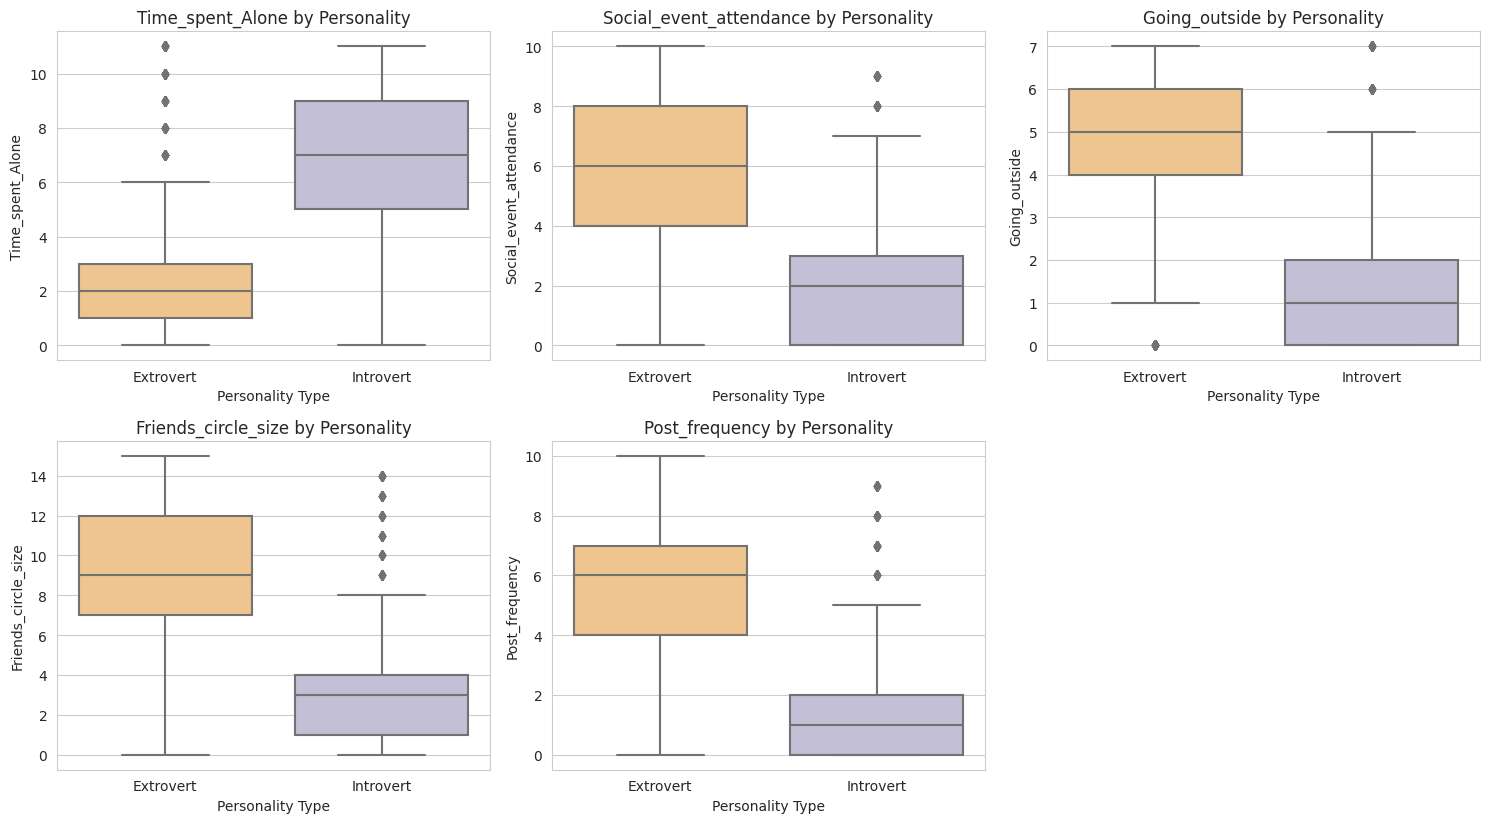

In [14]:
# Categorical vs. Numerical (using Box Plots or Violin Plots)
print("\nBox Plots of Numerical Features by Personality Type:")
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x='Personality', y=col, palette='PuOr')
    plt.title(f'{col} by Personality')
    plt.xlabel('Personality Type')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Outlier Detection:
- Box plots revealed potential outliers in 'Time_spent_Alone', 'Social_event_attendance', 'Friends_circle_size', and 'Post_frequency'
- However, given the nature and defined ranges of these features (e.g., hours, counts), many of these outliers likely represent valid, albeit less common, extreme behaviors within the dataset's scope rather than data entry errors.



Relationship between Binary Categorical Features and Personality:


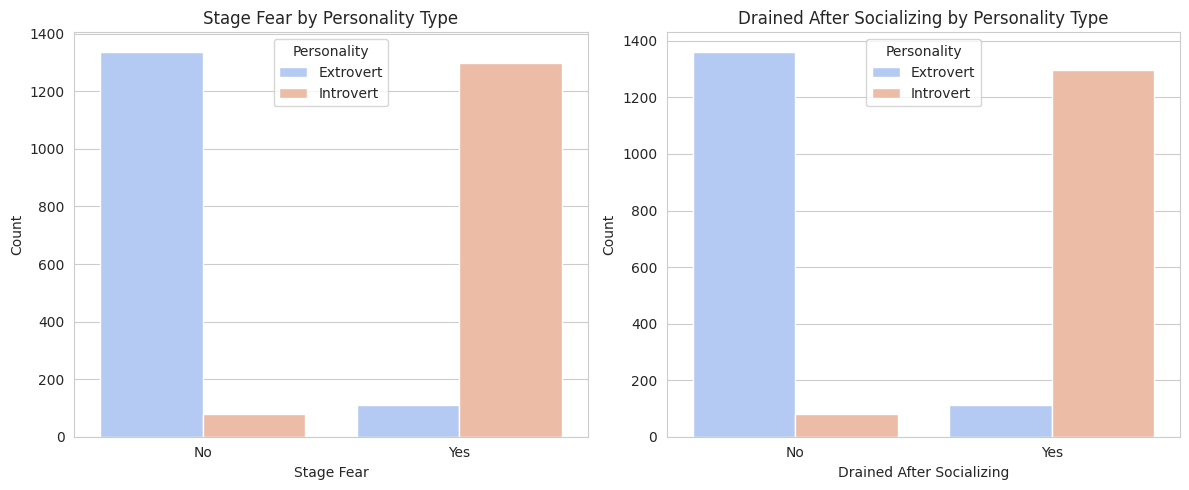

In [15]:
print("\nRelationship between Binary Categorical Features and Personality:")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df, x='Stage_fear', hue='Personality', palette='coolwarm', ax=axes[0])
axes[0].set_title('Stage Fear by Personality Type')
axes[0].set_xlabel('Stage Fear')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='Drained_after_socializing', hue='Personality', palette='coolwarm', ax=axes[1])
axes[1].set_title('Drained After Socializing by Personality Type')
axes[1].set_xlabel('Drained After Socializing')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [16]:
print("\nCross-tabulation: Stage_fear vs. Personality")
print(pd.crosstab(df['Stage_fear'], df['Personality'], normalize='index'))

print("\nCross-tabulation: Drained_after_socializing vs. Personality")
print(pd.crosstab(df['Drained_after_socializing'], df['Personality'], normalize='index'))


Cross-tabulation: Stage_fear vs. Personality
Personality  Extrovert  Introvert
Stage_fear                       
No            0.944248   0.055752
Yes           0.078723   0.921277

Cross-tabulation: Drained_after_socializing vs. Personality
Personality                Extrovert  Introvert
Drained_after_socializing                      
No                          0.945177   0.054823
Yes                         0.078891   0.921109


# Observations from categorical vs. categorical:
- Introverts are much more likely to report 'Yes' for Stage_fear and Drained_after_socializing.
- Extroverts are much more likely to report 'No' for Stage_fear and Drained_after_socializing.
This aligns perfectly with the common understanding of these personality types.

# Feature selection

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline


In [18]:
# Handle missing values
df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].median(), inplace=True)
df['Going_outside'].fillna(df['Going_outside'].median(), inplace=True)
df['Stage_fear'].fillna('Unknown', inplace=True)
df['Drained_after_socializing'].fillna('Unknown', inplace=True)

/tmp/ipykernel_13/2398753697.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].median(), inplace=True)
/tmp/ipykernel_13/2398753697.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [19]:
# Label Encode categorical
le1 = LabelEncoder()
le2 = LabelEncoder()
df['Stage_fear'] = le1.fit_transform(df['Stage_fear'])
df['Drained_after_socializing'] = le2.fit_transform(df['Drained_after_socializing'])

# Encode target
target_le = LabelEncoder()
df['Personality'] = target_le.fit_transform(df['Personality'])

In [20]:
# Separate features/target
X = df.drop('Personality', axis=1)
y = df['Personality']

# Check for any non-numeric columns
print(X.dtypes)

Time_spent_Alone             float64
Stage_fear                     int64
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing      int64
Friends_circle_size          float64
Post_frequency               float64
dtype: object


In [21]:
# Encode categorical features
le1 = LabelEncoder()
le2 = LabelEncoder()
le_target = LabelEncoder()

df['Stage_fear'] = le1.fit_transform(df['Stage_fear'])
df['Drained_after_socializing'] = le2.fit_transform(df['Drained_after_socializing'])
df['Personality'] = le_target.fit_transform(df['Personality'])  # 0 = extrovert, 1 = introvert

# Features and Target
X = df.drop('Personality', axis=1)
y = df['Personality']
